# Your Uni : wx3028
# Your Full name : Xiaoyi Wang
# Link to your Public Github repository with Final report  :
Xiaoyi Wang: https://github.com/SoyaWang/QMSSGR5074_001_2025_1---PROJECTS-IN-ADVANCED-MACHINE-LEARNING

### Submission Due Date: 03/07/2025

# World Happiness Classification Competition
Goals :
- Understand how the models function
- Understand what the parameters control
- Learn from the model experimentation process
- Make a good looking notebook report
- Upload as a personal project on Github

**Overall Steps:**
1. Load datasets and merge them.
2. Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function
3. Fit model on preprocessed data and save preprocessor function and model
4. Generate predictions from X_test data and submit predictions



## 0. Loading Datasets

Loading the World Happiness 2023 datasets

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
whr_df = pd.read_csv('WHR_2023.csv')

# Inspect the first few rows to understand the structure
whr_df


,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027


In [2]:
# Convert the regression target ('happiness_score') into classification labels
# We'll use quartiles to create 5 happiness categories: Very Low, Low, Average, High, Very High

# Define quartiles
whr_df['happiness_category'] = pd.qcut(whr_df['happiness_score'],
                                       q=5,
                                       labels=['Very Low', 'Low', 'Average', 'High', 'Very High'])

# Select features and target
X = whr_df.drop(columns=['happiness_score', 'happiness_category'])
y = whr_df['happiness_category']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Convert y_train and y_test to numerical labels
y_train_labels = y_train.astype('category').cat.codes
y_test_labels = y_test.astype('category').cat.codes


**Write in the next cell what the y_train.astype('category').cat.codes line does. What is the difference between y_train_labels and y_train?**


The line 'y_train.astype('category').cat.codes' converts the y_train Series, which contains the original  
categorical labels (e.g., 'Very Low', 'Low', 'Average', 'High', 'Very High'), into a pandas Categorical type.  
Then, by accessing '.cat.codes', it extracts the underlying numeric codes for each category.  

'y_train' Contains the original categorical labels (as strings or categorical data).  
'y_train_labels' Contains the corresponding integer codes (e.g., 0, 1, 2, 3, 4) that represent each category.  
   
The numeric labels (y_train_labels) are often required by many machine learning algorithms,  
while y_train holds the human-readable labels.

<h3> Add new data

In [3]:
# Truncated and cleaned up region data to merge
countrydata=pd.read_csv("newcountryvars.csv")

countrydata.head()

,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,India,1339180127,21.9,0.623559,68.322,11.696590,6.298834,5663.474799
1,Nigeria,190886311,70.0,0.527105,53.057,9.970482,6.000000,5442.901264
2,Mexico,129163276,46.2,0.761683,76.972,13.299090,8.554985,16383.106680
3,Pakistan,197015955,29.5,0.550354,66.365,8.106910,5.089460,5031.173074
4,Bangladesh,164669751,31.5,0.578824,71.985,10.178706,5.241577,3341.490722


In [4]:
# Merge in new data to X_train and X_test by taking "country" from first table and "country_name" from 2nd table.
# Also check which countries are common in both the datasets, and which type of merge will you perform for the best results.
# Hint: Look on the 'how' parameter of megre function of pandas.
common_countries = set(X_train['country']).intersection(set(countrydata['country_name']))
print("countries in common：", common_countries)

X_train = pd.merge(X_train, countrydata, left_on='country', right_on='country_name', how='left')
X_train.drop(columns=['country_name'], inplace=True)

X_test = pd.merge(X_test, countrydata, left_on='country', right_on='country_name', how='left')
X_test.drop(columns=['country_name'], inplace=True)



countries in common： {'Belgium', 'Romania', 'Ivory Coast', 'Zambia', 'Sweden', 'New Zealand', 'Serbia', 'Ghana', 'Iraq', 'Saudi Arabia', 'Honduras', 'Iceland', 'Afghanistan', 'China', 'Nepal', 'Tanzania', 'Indonesia', 'Madagascar', 'Australia', 'Montenegro', 'Sierra Leone', 'Egypt', 'Colombia', 'Venezuela', 'Morocco', 'Slovakia', 'India', 'Mali', 'Italy', 'Finland', 'Bulgaria', 'Austria', 'Thailand', 'Sri Lanka', 'Nigeria', 'Peru', 'Iran', 'Burkina Faso', 'Comoros', 'Denmark', 'Greece', 'South Korea', 'Malawi', 'Togo', 'Hungary', 'Cambodia', 'Cyprus', 'Chile', 'Bosnia and Herzegovina', 'Bolivia', 'Luxembourg', 'Estonia', 'Niger', 'Namibia', 'Netherlands', 'Singapore', 'Mauritius', 'Latvia', 'Brazil', 'Jordan', 'Malta', 'El Salvador', 'Ethiopia', 'Dominican Republic', 'Ukraine', 'Mongolia', 'Poland', 'Slovenia', 'Portugal', 'Zimbabwe', 'Senegal', 'Spain', 'Mexico', 'Kenya', 'Lithuania', 'Tajikistan', 'Uganda', 'United Kingdom', 'Pakistan', 'Norway', 'Mauritania', 'Uzbekistan', 'Jamaica'

In [5]:
X_train.head(1)

,country,region,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,Madagascar,Sub-Saharan Africa,0.632,0.779,0.178,0.187,0.177,0.134,25570895.0,70.7,0.512149,65.515,10.34614,6.145955,1319.699397


## 1.  EDA

In [6]:
print(X_train.dtypes)

country                           object
region                            object
gdp_per_capita                   float64
social_support                   float64
healthy_life_expectancy          float64
freedom_to_make_life_choices     float64
generosity                       float64
perceptions_of_corruption        float64
population                       float64
population_below_poverty_line    float64
hdi                              float64
life_expectancy                  float64
expected_years_of_schooling      float64
mean_years_of_schooling          float64
gni                              float64
dtype: object


**Describe what you see above?**

The output shows the data types for each column in your X_train dataset:

Columns country and region are object type columns. These are stored as objects, which typically means they are strings (or categorical data). They represent non-numeric information, like the names of countries and regions.
  
Columns such as gdp_per_capita, social_support, healthy_life_expectancy, freedom_to_make_life_choices, generosity, perceptions_of_corruption, gdp_social, population, population_below_poverty_line, hdi, life_expectancy, expected_years_of_schooling, mean_years_of_schooling, and gni are all stored as float64.
This indicates that these features are numerical and are likely continuous variables. They represent various metrics and indicators related to country-level data (like economic, social, and health indicators).


**Find out the number and percentage of missing values in the table per column**

In [7]:
# Your code here:

missing_counts = X_train.isnull().sum()

missing_percentages = (missing_counts / len(X_train)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percentages
})

print(missing_info)

                               Missing Count  Missing Percentage
country                                    0            0.000000
region                                     0            0.000000
gdp_per_capita                             0            0.000000
social_support                             0            0.000000
healthy_life_expectancy                    0            0.000000
freedom_to_make_life_choices               0            0.000000
generosity                                 0            0.000000
perceptions_of_corruption                  0            0.000000
population                                 6            6.315789
population_below_poverty_line             16           16.842105
hdi                                        6            6.315789
life_expectancy                            7            7.368421
expected_years_of_schooling                7            7.368421
mean_years_of_schooling                    7            7.368421
gni                      

**Plot the frequency distribution / histogram of some of the numerical features that you think are important**

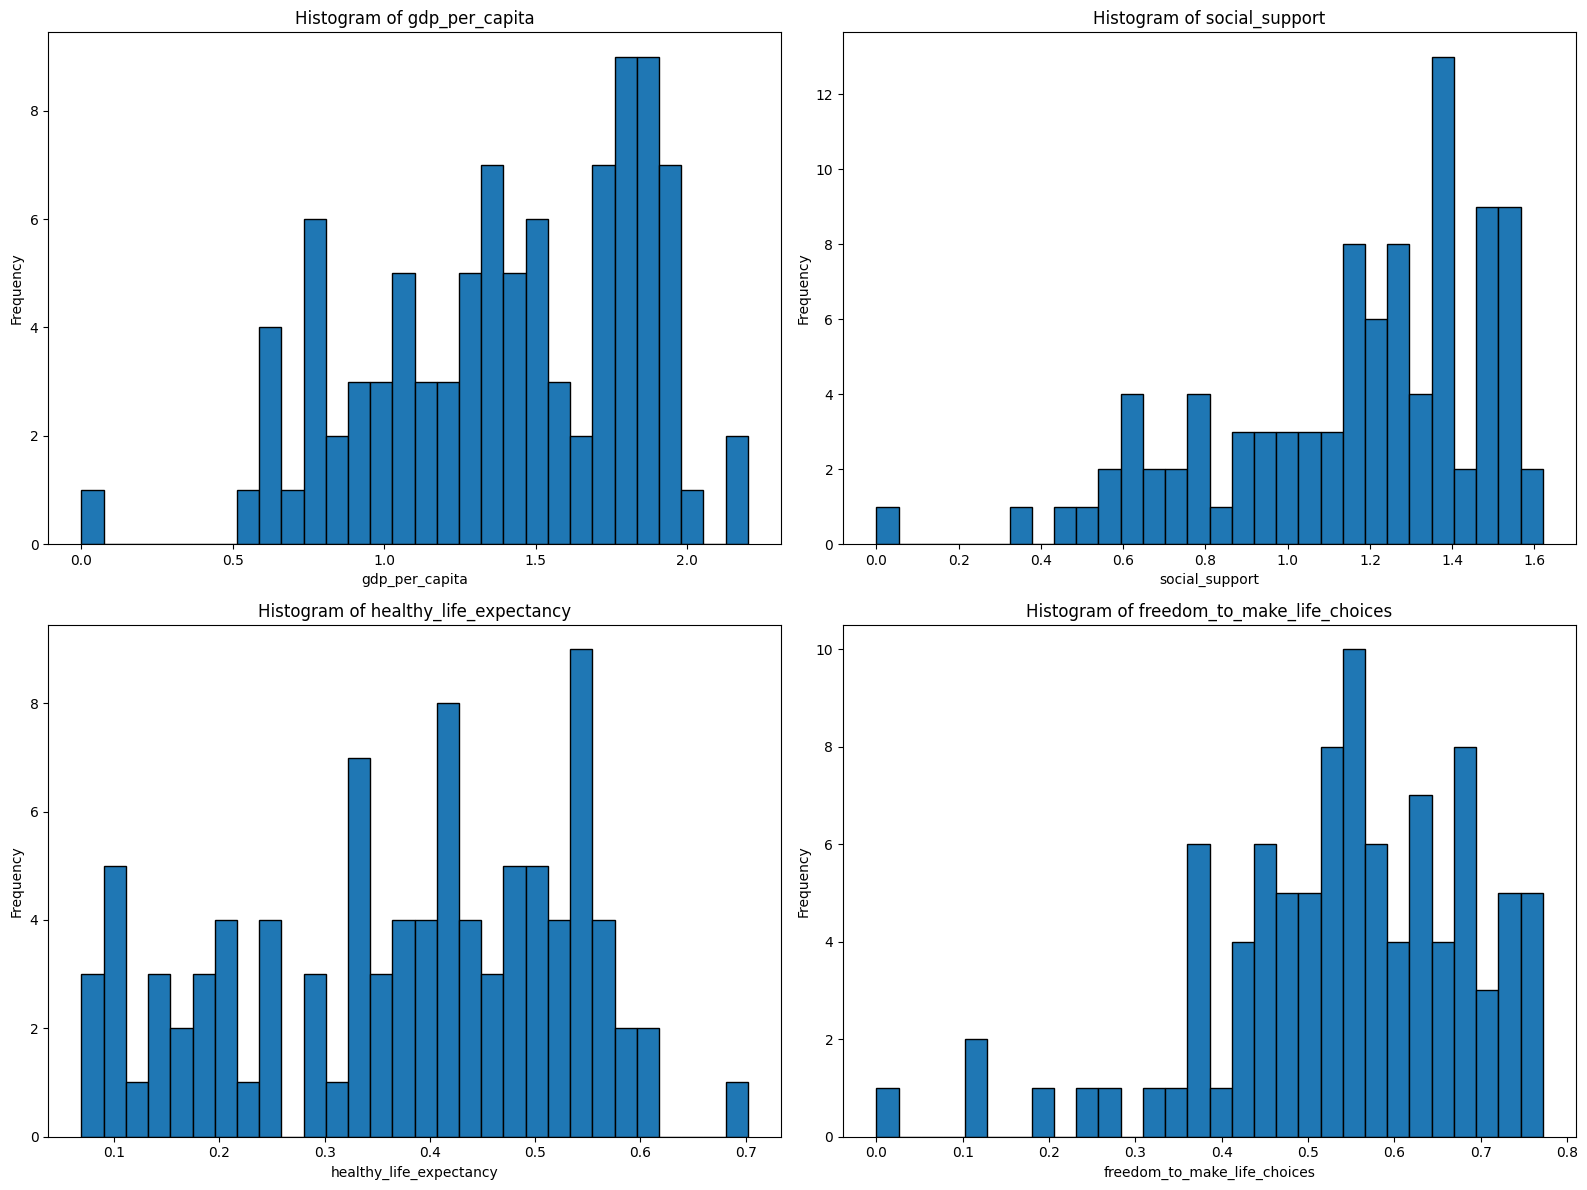

In [8]:
# Your plotting code here:
import matplotlib.pyplot as plt

numerical_features = ['gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices']

plt.figure(figsize=(16, 12))

for idx, feature in enumerate(numerical_features):
    plt.subplot(2, 2, idx + 1)
    plt.hist(X_train[feature].dropna(), bins=30, edgecolor='black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Plot the categorical variables and their distribution**

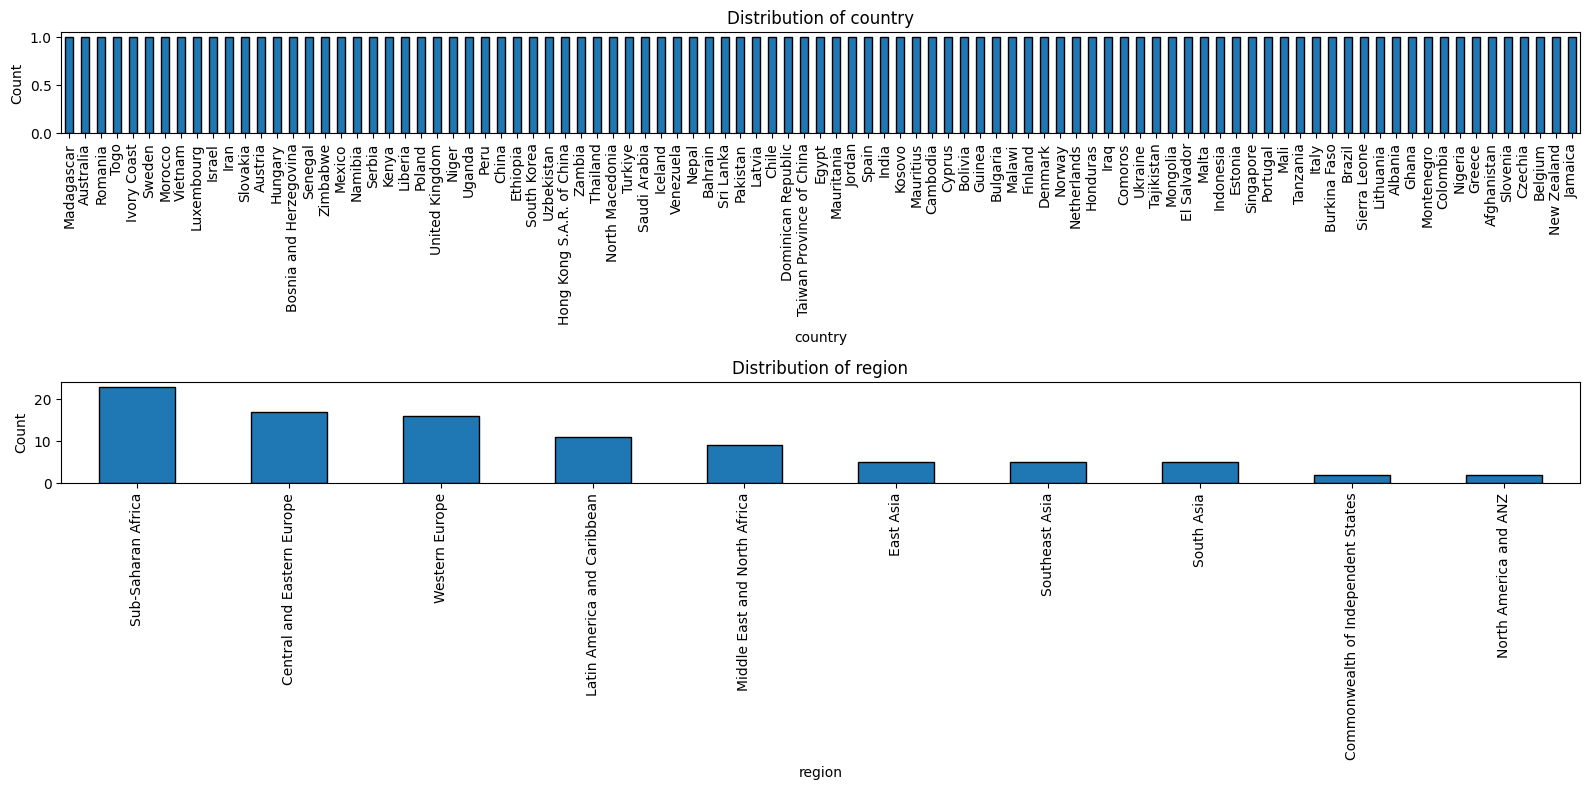

In [9]:
# Your plotting code here:
categorical_columns = X_train.select_dtypes(include='object').columns

plt.figure(figsize=(16, 4 * len(categorical_columns)))

for i, col in enumerate(categorical_columns):
    plt.subplot(len(categorical_columns), 1, i + 1)
    counts = X_train[col].value_counts()
    counts.plot(kind='bar', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

**Perform feature correlation analysis to identify relationships between variables. Use Pearson, Spearman, or Kendall correlation coefficients to analyze feature dependencies.**

In [10]:
# Your code here:(using pearson correlation coefficient)
import matplotlib.pyplot as plt
import numpy as np

numeric_features = X_train.select_dtypes(include=[np.number]).columns
pearson_corr = X_train[numeric_features].corr(method='pearson')

print("Pearson Correlation Matrix:")
display(pearson_corr)



Pearson Correlation Matrix:


,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
gdp_per_capita,1.000000,0.769394,0.860164,0.483145,-0.115580,0.432076,-0.045583,-0.620790,0.902386,0.830886,0.820940,0.815423,0.834177
social_support,0.769394,1.000000,0.771294,0.571646,0.084327,0.301807,-0.109651,-0.605304,0.855297,0.774096,0.809587,0.845490,0.667188
healthy_life_expectancy,0.860164,0.771294,1.000000,0.441636,-0.114189,0.414878,-0.043507,-0.716390,0.929456,0.959434,0.845512,0.834757,0.769030
freedom_to_make_life_choices,0.483145,0.571646,0.441636,1.000000,0.192401,0.372781,0.119970,-0.476459,0.519108,0.514694,0.453316,0.468835,0.483939
generosity,-0.115580,0.084327,-0.114189,0.192401,1.000000,0.105359,0.025726,-0.058728,-0.065485,-0.105490,-0.028513,-0.005128,0.015789
perceptions_of_corruption,0.432076,0.301807,0.414878,0.372781,0.105359,1.000000,-0.056750,-0.181277,0.421911,0.414737,0.398154,0.399698,0.666834
population,-0.045583,-0.109651,-0.043507,0.119970,0.025726,-0.056750,1.000000,-0.140834,-0.065315,-0.041229,-0.086023,-0.118630,-0.113701
population_below_poverty_line,-0.620790,-0.605304,-0.716390,-0.476459,-0.058728,-0.181277,-0.140834,1.000000,-0.683361,-0.719110,-0.582770,-0.579371,-0.537597
hdi,0.902386,0.855297,0.929456,0.519108,-0.065485,0.421911,-0.065315,-0.683361,1.000000,0.932439,0.939177,0.934324,0.831201
life_expectancy,0.830886,0.774096,0.959434,0.514694,-0.105490,0.414737,-0.041229,-0.719110,0.932439,1.000000,0.852332,0.811818,0.764468


**Explore relationships between variables (bivariate, etc), correlation tables, and how they associate with the target variable.**

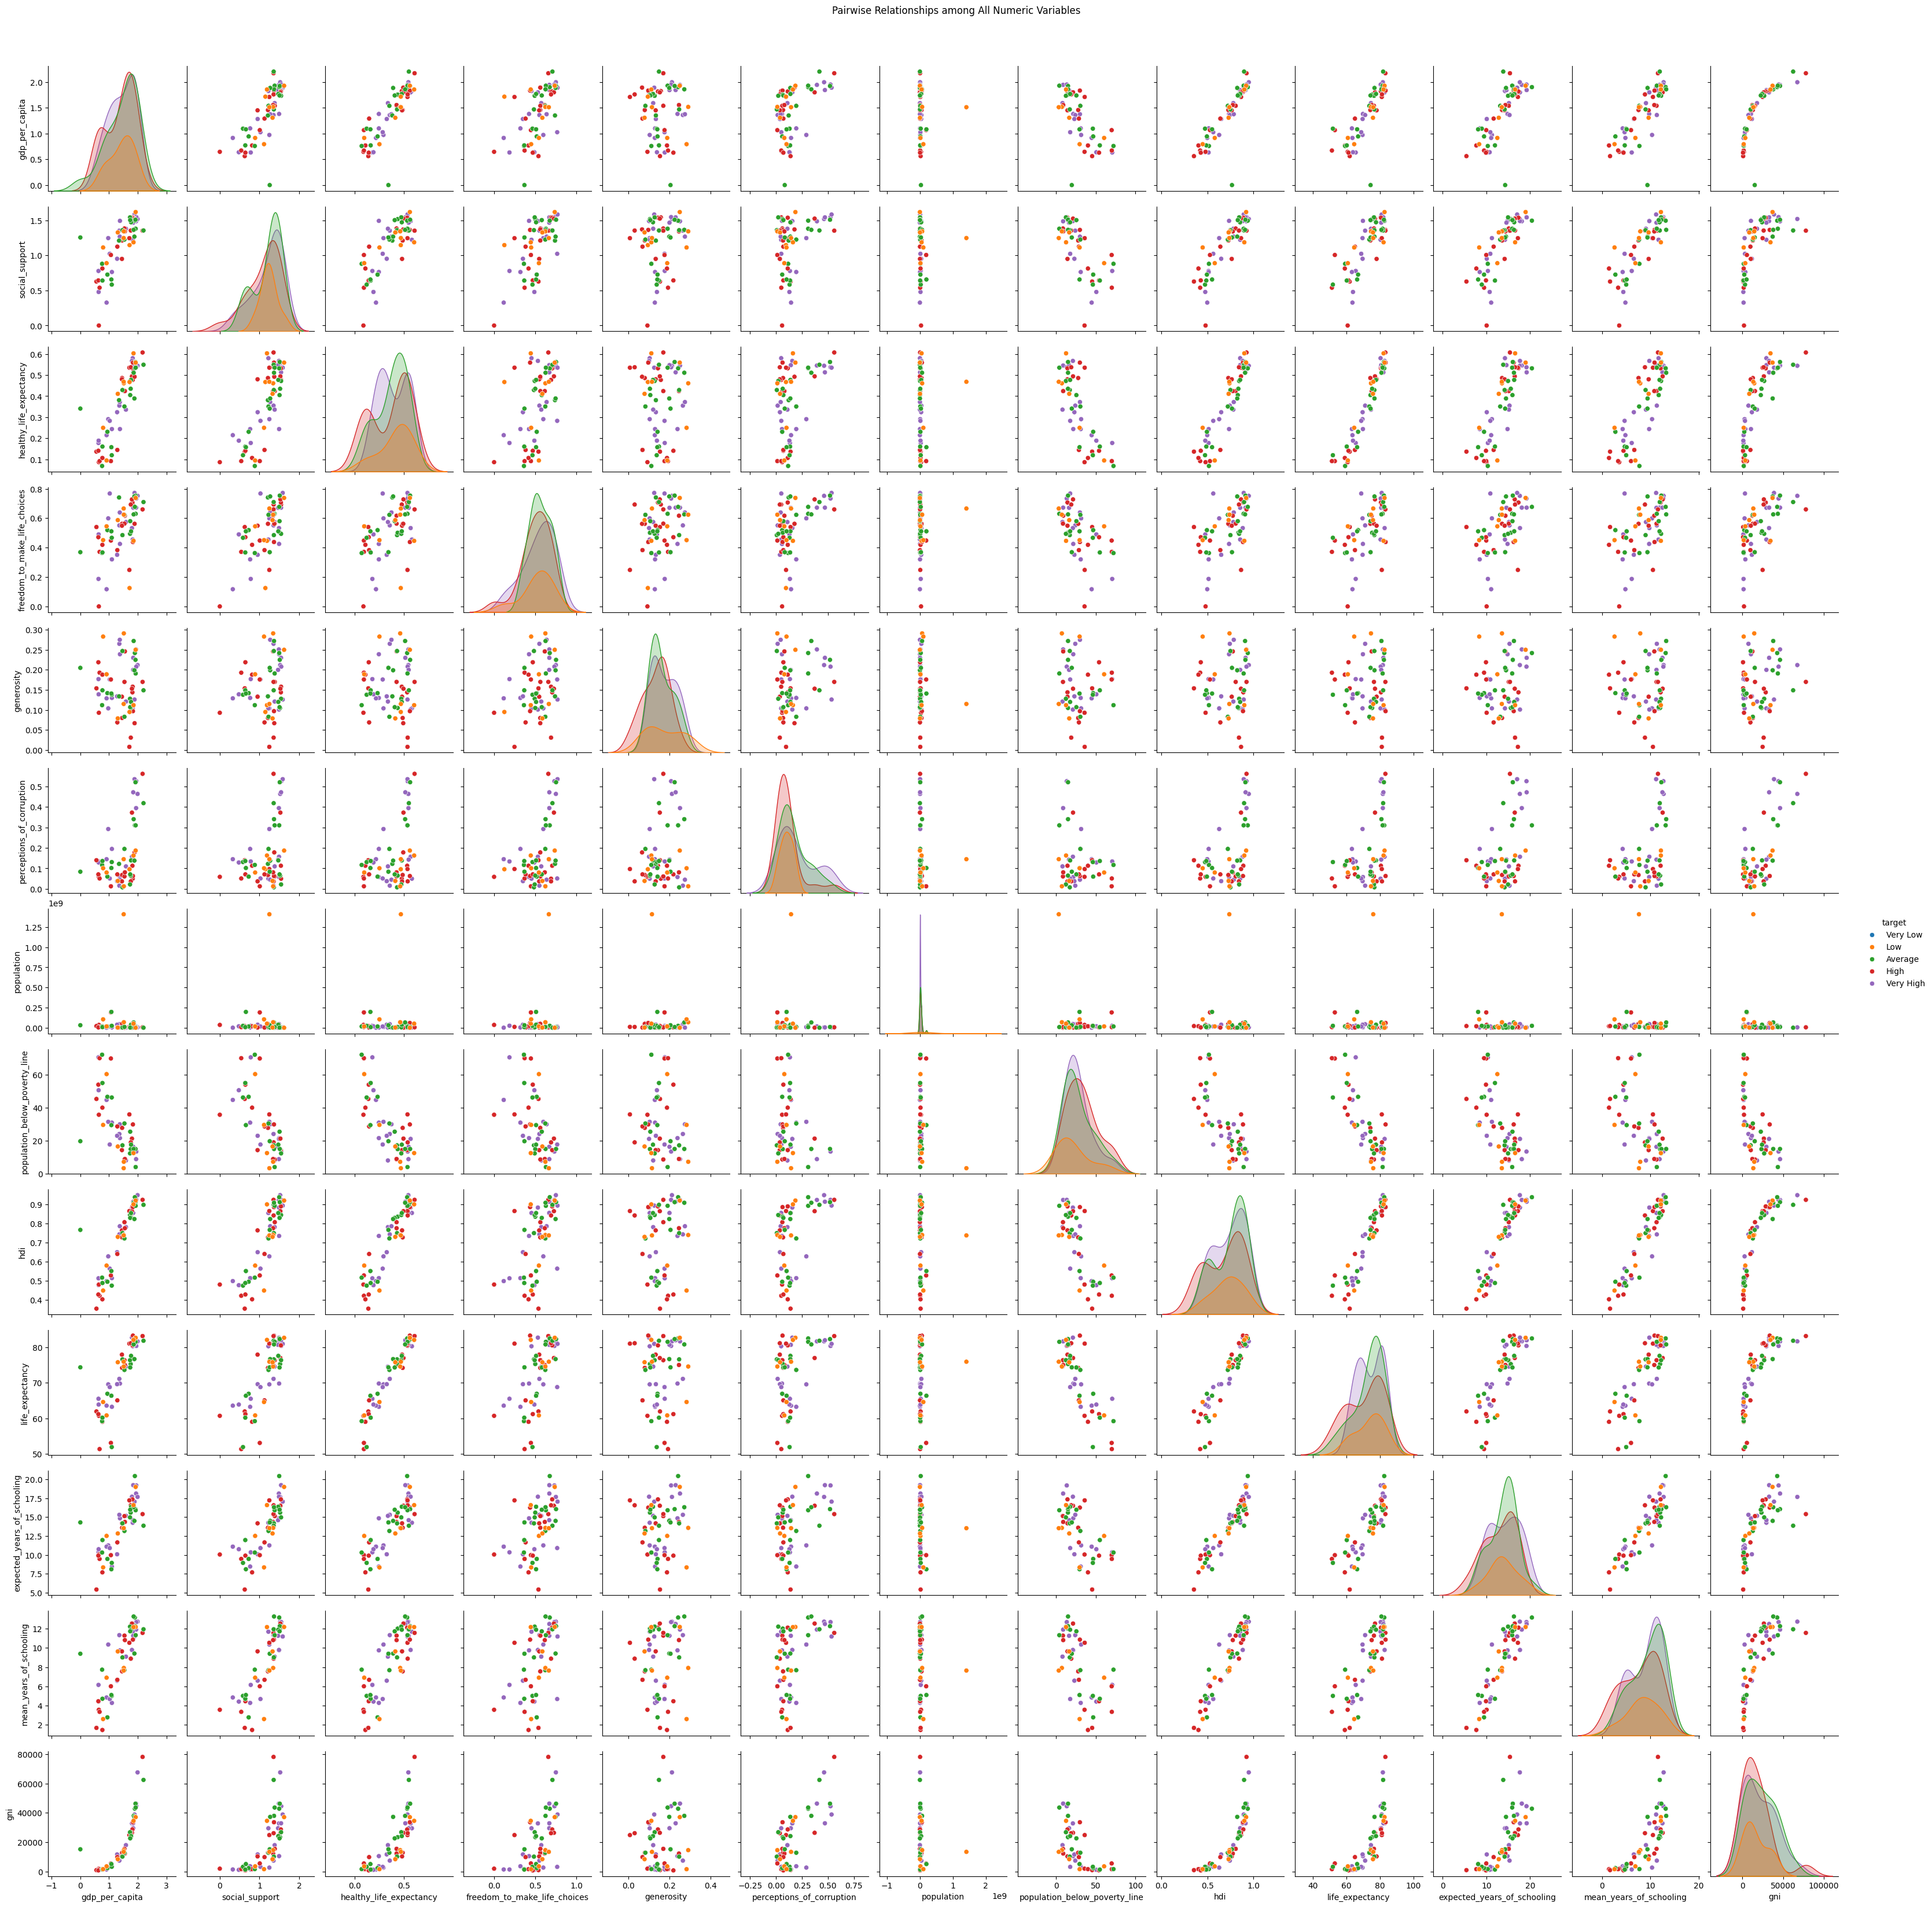

In [11]:
# Your plotting code(s) here:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

train_data = X_train.copy()
train_data['target'] = y_train

numeric_features = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

if 'target' in numeric_features:
    numeric_features.remove('target')

sns.pairplot(train_data, vars=numeric_features, hue='target', diag_kind='kde')
plt.suptitle("Pairwise Relationships among All Numeric Variables", y=1.02)
plt.show()


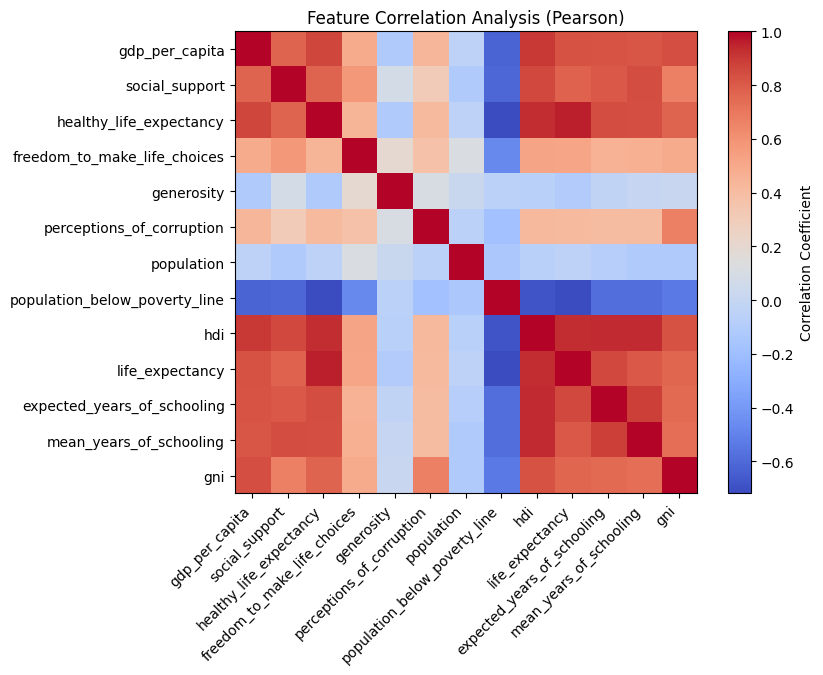

In [12]:
# Your plotting code(s) here:
# Plot the Pearson correlation matrix
plt.figure(figsize=(8, 6))
plt.imshow(pearson_corr, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(ticks=np.arange(len(numeric_features)), labels=numeric_features, ha='right', rotation=45)
plt.yticks(ticks=np.arange(len(numeric_features)), labels=numeric_features)
plt.title('Feature Correlation Analysis (Pearson)')
plt.show()

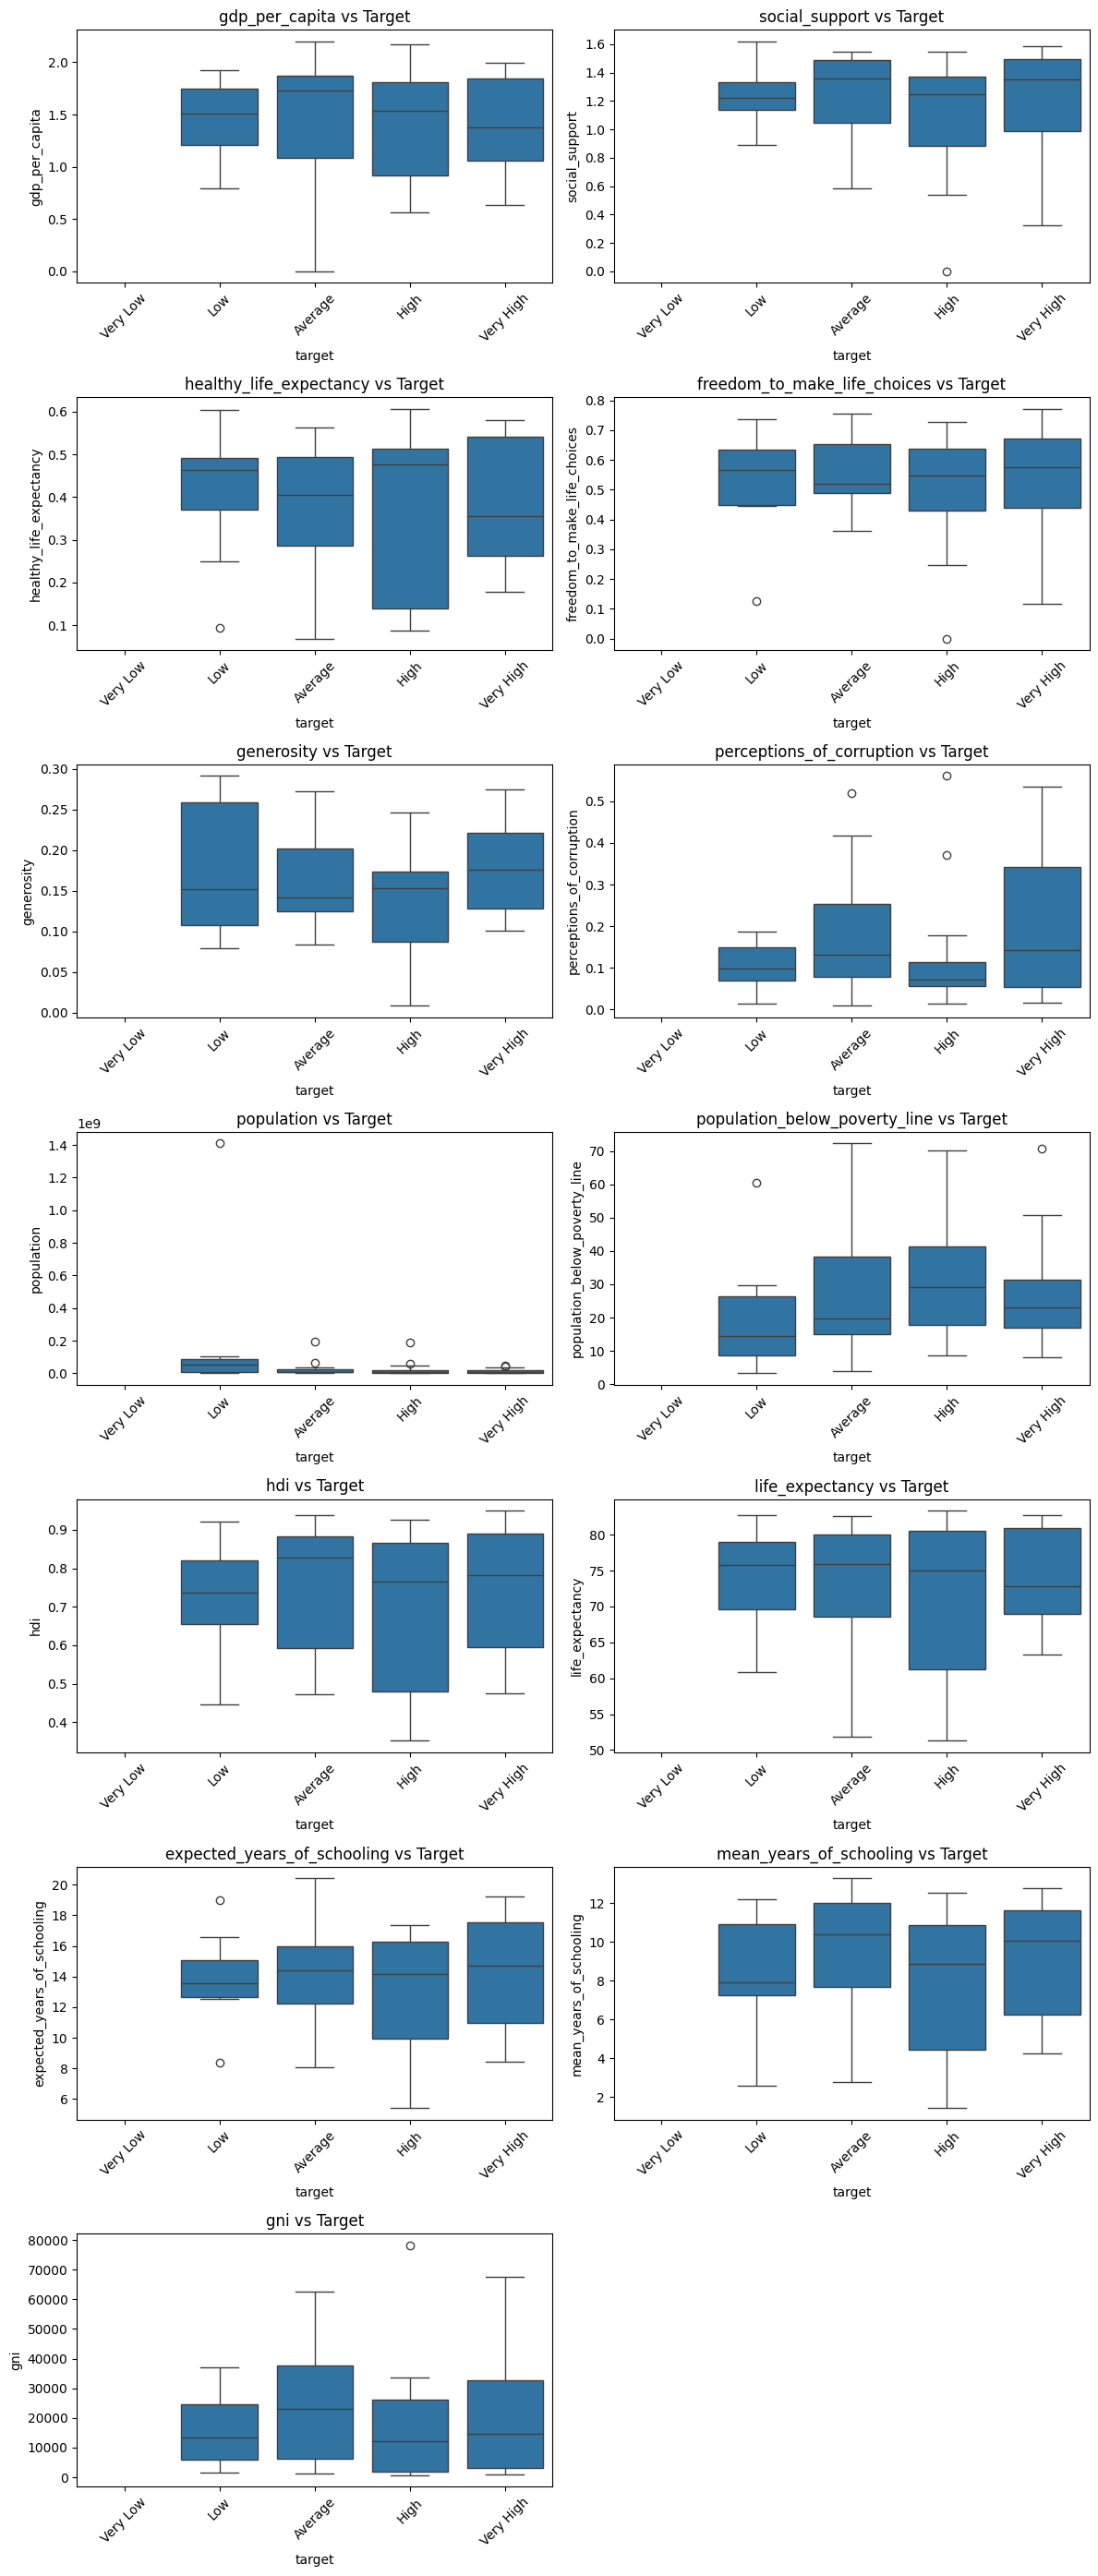

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

ncols = 2
n_features = len(numeric_features)
nrows = math.ceil(n_features / ncols)

plt.figure(figsize=(ncols * 6, nrows * 4))

for i, feature in enumerate(numeric_features):
    plt.subplot(nrows, ncols, i + 1)
    sns.boxplot(data=train_data, x='target', y=feature)
    plt.title(f"{feature} vs Target")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


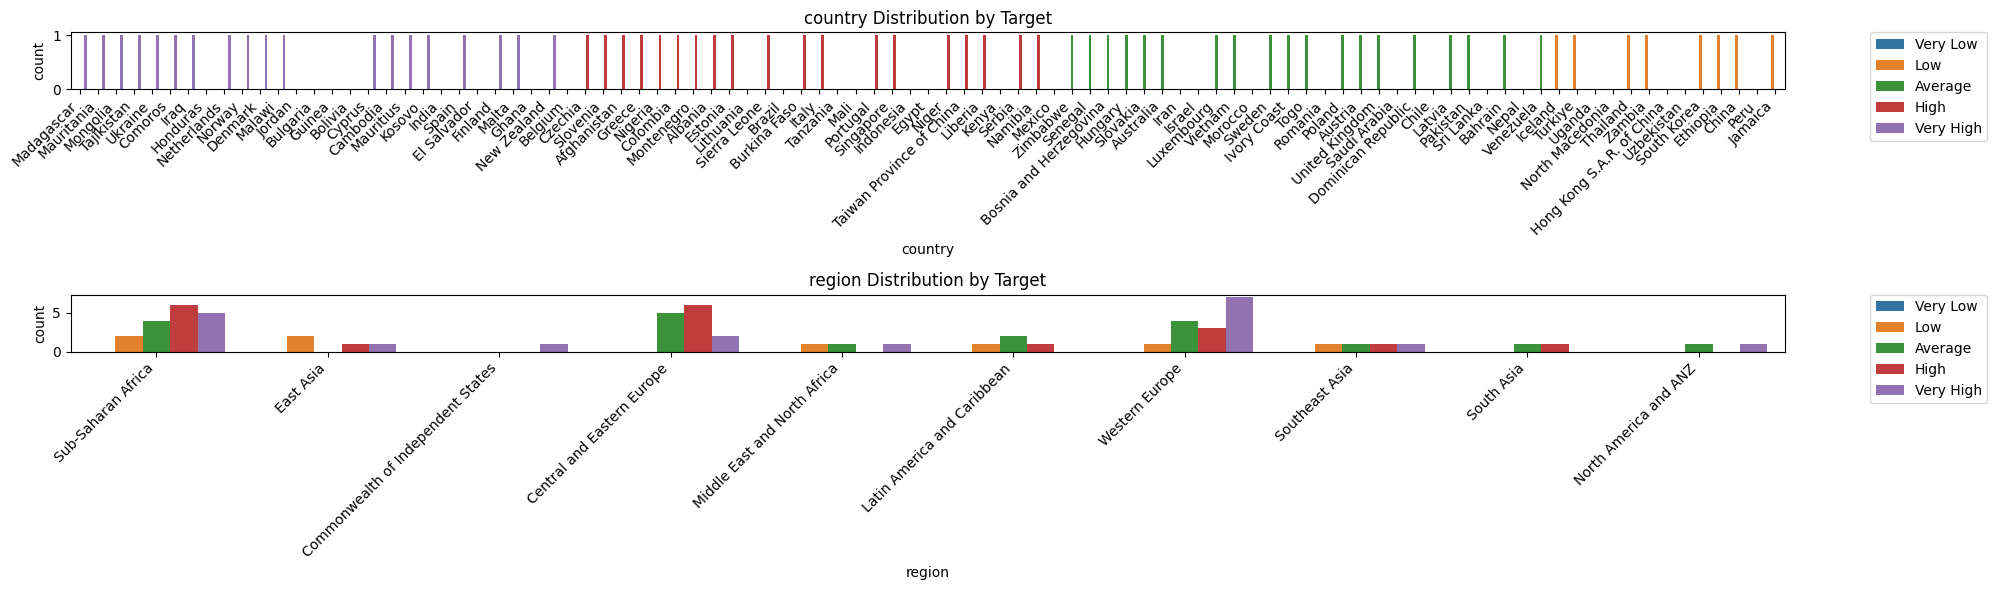

In [14]:
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

plt.figure(figsize=(20, len(categorical_features) * 3))

for i, feature in enumerate(categorical_features):
    ax = plt.subplot(len(categorical_features), 1, i + 1)
    sns.countplot(data=train_data, x=feature, hue='target', ax=ax)

    ax.set_title(f"{feature} Distribution by Target")

    plt.xticks(rotation=45, ha='right')

    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.tight_layout()
plt.show()

**Also, detect outliers using box plots, Z-score analysis, or the IQR method to identify potential data anomalies.**

In [15]:
# Your code here(using IQR):
outliers_info = {}

for feature in numeric_features:
    Q1 = X_train[feature].quantile(0.25)
    Q3 = X_train[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = X_train[(X_train[feature] < lower_bound) | (X_train[feature] > upper_bound)]

    outliers_info[feature] = {
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Number of Outliers': outliers.shape[0]
    }

print("Outlier detection using the IQR method:")
for feature, info in outliers_info.items():
    print(f"{feature}: {info}")


Outlier detection using the IQR method:
gdp_per_capita: {'Lower Bound': 0.0014999999999996128, 'Upper Bound': 2.8975000000000004, 'Number of Outliers': 1}
social_support: {'Lower Bound': 0.33174999999999977, 'Upper Bound': 2.01375, 'Number of Outliers': 2}
healthy_life_expectancy: {'Lower Bound': -0.14, 'Upper Bound': 0.892, 'Number of Outliers': 0}
freedom_to_make_life_choices: {'Lower Bound': 0.15150000000000002, 'Upper Bound': 0.9555, 'Number of Outliers': 3}
generosity: {'Lower Bound': -0.04525, 'Upper Bound': 0.35675, 'Number of Outliers': 1}
perceptions_of_corruption: {'Lower Bound': -0.10974999999999999, 'Upper Bound': 0.34024999999999994, 'Number of Outliers': 10}
population: {'Lower Bound': -39990215.0, 'Upper Bound': 81177457.0, 'Number of Outliers': 9}
population_below_poverty_line: {'Lower Bound': -15.524999999999991, 'Upper Bound': 65.87499999999999, 'Number of Outliers': 4}
hdi: {'Lower Bound': 0.1248623015000001, 'Upper Bound': 1.2934486815, 'Number of Outliers': 0}
life

**Write what you observed and your General comments on what should be done:**

### Observations
Relationships Between Variables:  

The pairwise scatter plots and correlation heatmaps indicate that some numerical features tend to be positively correlated. For example, GDP per Capita & Healthy Life Expectancy, suggesting that countries with higher economic indicators often also have better health outcomes; GDP per Capita & HDI (Human Development Index) shows a strong positive correlation between economic performance and human development outcomes. Also, Education Indicators & Economic Indicators reflects the common observation that more economically developed countries tend to invest more in education, leading to higher levels of human capital.  
Other features may show little or no linear association, for example, the generosity variable usually shows a weaker correlation with economic indicators; total population tends not to be directly related to development indicators or happiness scores, implying that their effect on the target might be less direct or perhaps non-linear.  

Associations with the Target Variable:  

Box plots comparing numerical features across different target categories reveal that certain features exhibit noticeable differences among groups. For instance, one might observe that countries classified as “Very High” in happiness tend to have higher social support or GDP per capita values compared to those in lower categories.
For categorical features (such as region or country names), the distribution plots suggest some groups are more frequently associated with specific target categories, hinting at underlying regional patterns.  

Outlier Analysis:  

The IQR method quantitatively confirms the presence of outliers, with some features having a significant number of observations beyond the typical range.

### General comments
Handling Outliers:  

Investigate Extreme Values: Examine outliers to determine whether they are due to data entry errors, measurement issues, or genuine variability.  
Data Cleaning or Transformation: Depending on their nature, consider removing, capping, or transforming outliers (e.g., using log or square root transformations) to mitigate their influence on model performance.  
Robust Modeling: Alternatively, employ robust algorithms that are less sensitive to outliers if removal is not feasible.  

Feature Engineering and Selection:  

Dealing with Multicollinearity: High correlations between some numerical features suggest the potential for multicollinearity. Consider combining these features or selecting a subset to improve model interpretability and performance.  
Transformation of Skewed Data: For features with noticeable skewness, applying appropriate transformations may help in achieving a more normal distribution, which can benefit many modeling techniques.  
Categorical Variables: Evaluate the importance of categorical features and consider encoding them properly (e.g., one-hot encoding) for subsequent modeling.  

Further Analysis:  

Non-linear Relationships: If some features show non-linear associations with the target, consider exploring non-linear transformations or advanced models (e.g., tree-based models) that can capture these relationships.  
Domain Knowledge: Incorporate domain expertise to understand if the observed patterns make sense and to determine the best approach for feature selection and preprocessing.  

Modeling Considerations:  

Data Scaling: Given the differences in the range of numerical features, applying standardization or normalization could be beneficial.
Cross-validation: Ensure that any preprocessing steps (especially those handling outliers) are integrated with the modeling pipeline and validated properly using cross-validation techniques.


## 2. Feature Engineering

**Apply log transformations to normalize skewed data and improve model stability (If any).**

In [16]:
# Your code here:
import numpy as np
import pandas as pd
from scipy.stats import skew

numeric_features = X_train.select_dtypes(include=[np.number]).columns

skewed_feats = []
for col in numeric_features:
    skew_val = skew(X_train[col].dropna())
    if abs(skew_val) > 1:
        skewed_feats.append(col)

print("Skewed Features:", skewed_feats)


Skewed Features: ['perceptions_of_corruption', 'population', 'population_below_poverty_line', 'gni']


In [17]:

# List of skewed features identified
skewed_feats = ['perceptions_of_corruption', 'population', 'population_below_poverty_line', 'gni']

# apply log transformation
for feat in skewed_feats:
    min_val = X_train[feat].min()
    if min_val <= 0:
        shift = abs(min_val) + 1
    else:
        shift = 0
    X_train[feat] = np.log1p(X_train[feat] + shift)
    X_test[feat] = np.log1p(X_test[feat] + shift)

    print(f"{feat}: shift = {shift} applied. New skewness (train) = {np.round(np.abs(np.log1p(X_train[feat]).skew()), 2)}")


perceptions_of_corruption: shift = 1.0 applied. New skewness (train) = 1.42
population: shift = 0 applied. New skewness (train) = 0.15
population_below_poverty_line: shift = 0 applied. New skewness (train) = 0.97
gni: shift = 0 applied. New skewness (train) = 0.58


**Create at least one interaction feature to capture relationship between existing variables, enhancing predictive power.**

In [18]:
# Your code here:
# Interact the product of GDP per capita and social support
whr_df['gdp_social'] = whr_df['gdp_per_capita'] * whr_df['social_support']

X = whr_df.drop(columns=['happiness_score', 'happiness_category'])
y = whr_df['happiness_category']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(X_train[['gdp_per_capita', 'social_support', 'gdp_social']].head())


     gdp_per_capita  social_support  gdp_social
126           0.632           0.779    0.492328
102           1.099           0.764    0.839636
60            1.379           1.494    2.060226
79            0.972           1.248    1.213056
91            1.358           1.354    1.838732


## 3.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function


In [19]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.select_dtypes(include=['int64', 'float64'])
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), ## Is (strategy='constant', fill_value=0) good enough?(NO, for many of these features—such as life expectancy, years of schooling, and gni—a value of 0 is not realistic and could distort the distribution.)
    ('scaler', StandardScaler())]) # You will need to describe why this is being done in the next cell

categorical_features = ['region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer',  SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train)

**Describe step-by-step what we are doing above, and why? You are free to change how values are imputed. What change did you make if any, and why?**

We import various classes and functions from scikit-learn (such as StandardScaler, OneHotEncoder, ColumnTransformer, Pipeline, and SimpleImputer) that will be used to build preprocessing pipelines.  
We select all columns from X_train that have numeric data types (either integers or floats) and convert the resulting column index to a list. This gives us a list of numeric features that we need to preprocess (impute missing values and scale) separately from categorical features.  
Then We create a pipeline for numeric features which contains: Imputation(Missing values are replaced using SimpleImputer with a constant value of 0.) and Scaling(Standardization of the features is performed using StandardScaler, which scales data to have a mean of 0 and a standard deviation of 1.)  

Change:  
There's no 'sub_region' column in X_train data thus I delete it from categorical_features  
Instead of using strategy='constant', fill_value=0, I use a more appropriate strategy: strategy='median'.

In [20]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['country', 'region'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

**What are the differences between the "preprocessor" object, the "preprocess" object, the "preprocessor" function,  and the "preprocessed_data" that is returned finally?**

The "preprocessor" object is the ColumnTransformer we create, which defines the transformation pipelines for different feature types (numeric and categorical). It specifies what operations to perform (imputation, scaling, encoding) on which columns, but it hasn’t been fitted to data yet.  

The "preprocess" object is the fitted version of the "preprocessor" object. After calling preprocessor.fit(X_train), it learns the necessary parameters (e.g., medians, means, scales, categories) from the training data. We will then use this fitted object to transform new data consistently.  

The "preprocessor" function is a user-defined function (in this task, named preprocessor, later renamed to x_train_transformed) that uses the fitted "preprocess" object to transform a given dataset. It may also include additional steps like dropping specific columns before applying the transformation.  

The "preprocessed_data" is the final output that is returned by our "preprocessor" function. It is the transformed version of the input data, where all the specified preprocessing steps (imputation, scaling, encoding) have been applied.

In [21]:
# check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

(95, 17)

## 4. Fit model on preprocessed data and save preprocessor function and model


In [22]:
from sklearn.ensemble import RandomForestClassifier

X_train_transformed = preprocessor(X_train)
X_test_transformed = preprocessor(X_test)

y_train_labels = y_train.astype('category').cat.codes
y_test_labels = y_test.astype('category').cat.codes

# Define a Random Forest Model here, fit it, and score it
model = RandomForestClassifier(random_state=40)
model.fit(X_train_transformed, y_train_labels)
score = model.score(X_test_transformed, y_test_labels)

print("Random Forest model score:", score)
# Your cell should have a score between 0-1 as output

Random Forest model score: 0.5714285714285714


## 5. Generate predictions from X_test data and compare it with true labels in Y_test


In [23]:
#-- Generate predicted values (Model 1)
prediction_labels = model.predict(preprocessor(X_test))

## Write code to show model performance by comparing prediction_labels with true labels
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test_labels, prediction_labels)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test_labels, prediction_labels))

# Confusion matrix
print("Confusion Matrix:")
display(confusion_matrix(y_test_labels, prediction_labels))


Accuracy: 0.5714285714285714
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         9
           1       0.50      0.38      0.43         8
           2       0.50      0.75      0.60         8
           3       0.38      0.38      0.38         8
           4       0.86      0.67      0.75         9

    accuracy                           0.57        42
   macro avg       0.58      0.57      0.56        42
weighted avg       0.59      0.57      0.57        42

Confusion Matrix:


array([[6, 3, 0, 0, 0],
       [3, 3, 2, 0, 0],
       [0, 0, 6, 2, 0],
       [0, 0, 4, 3, 1],
       [0, 0, 0, 3, 6]])

## 6. Repeat the process with different parameters to improve the accuracy


In [24]:
from sklearn.ensemble import RandomForestClassifier

model_2 = RandomForestClassifier(
    random_state=40,
    n_estimators=600,
    max_depth=10,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt'
)

X_train_transformed = preprocessor(X_train)
X_test_transformed = preprocessor(X_test)

model_2.fit(X_train_transformed, y_train_labels)

score2 = model_2.score(X_test_transformed, y_test_labels)
print("Improved Random Forest model score:", score2)



Improved Random Forest model score: 0.6190476190476191


**What changes did you make, what do the parameters you changed control, and why does it improve performance?**

 Increasing the number of trees (n_estimators) reduces the model’s variance, leading to more stable and reliable predictions.  
 Setting a maximum depth=10 and increasing the minimum number of samples required to split nodes=4 or form leaves=2, I constrain each tree’s complexity. This helps prevent the model from memorizing noise in the training data, thereby improving generalization on unseen data.  
 Using 'sqrt' for max_features helps ensure that individual trees are diverse, which is beneficial in ensemble methods like Random Forest.

In [25]:
#Evaluate Model 2:

#-- Generate predicted y values (Model 2)
prediction_labels = model_2.predict(X_test_transformed)

## Write code to show model performance by comparing prediction_labels with true labels
accuracy = accuracy_score(y_test_labels, prediction_labels)
print("Model 2 Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test_labels, prediction_labels))

print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, prediction_labels))

Model 2 Accuracy: 0.6190476190476191
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.50      0.50      0.50         8
           2       0.50      0.75      0.60         8
           3       0.57      0.50      0.53         8
           4       0.86      0.67      0.75         9

    accuracy                           0.62        42
   macro avg       0.64      0.62      0.62        42
weighted avg       0.64      0.62      0.62        42

Confusion Matrix:
[[6 3 0 0 0]
 [2 4 2 0 0]
 [0 1 6 1 0]
 [0 0 3 4 1]
 [0 0 1 2 6]]


**Do you think it is worth making more changes to the parameters? Should we keep trying random values and see what works better? What is an alternative to doing this manually?**

NO, manually trying random values is inefficient and may not systematically lead to the best solution. An alternative is to use automated hyperparameter tuning methods such as GridSearchCV or RandomizedSearchCV, which allow you to define a parameter search space and systematically evaluate many combinations using cross-validation. More advanced techniques like Bayesian optimization (e.g., using libraries like Hyperopt or scikit-optimize) can also help efficiently explore the parameter space.

In [26]:
# Submit a third model using GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
param_grid = {
    'n_estimators': np.arange(100, 501, 100),
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Create a GridSearchCV object with RandomForestClassifier as the estimator
gridmodel = GridSearchCV(
    estimator=RandomForestClassifier(random_state=40),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

X_train_transformed = preprocess.transform(X_train)
y_train_labels = y_train.astype('category').cat.codes

gridmodel.fit(X_train_transformed, y_train_labels)

print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))


best mean cross-validation score: 0.579
best parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}


In [27]:
#Submit Model 3:

# Generate predictions using the best estimator from our GridSearchCV (Model 3)
prediction_labels = gridmodel.predict(X_test_transformed)

# Evaluate the model's performance by comparing the predicted labels with the true labels.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test_labels, prediction_labels)
print("Model 3 Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test_labels, prediction_labels))

print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, prediction_labels))



Model 3 Accuracy: 0.5714285714285714
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         9
           1       0.20      0.12      0.15         8
           2       0.46      0.75      0.57         8
           3       1.00      0.50      0.67         8
           4       0.88      0.78      0.82         9

    accuracy                           0.57        42
   macro avg       0.61      0.56      0.56        42
weighted avg       0.61      0.57      0.56        42

Confusion Matrix:
[[6 3 0 0 0]
 [5 1 2 0 0]
 [1 1 6 0 0]
 [0 0 3 4 1]
 [0 0 2 0 7]]


In [28]:
# Here are several classic ML architectures you can consider choosing from to experiment with next:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = SVC(random_state=40, kernel='rbf', C=1.0, gamma='scale')

X_train_transformed = preprocessor(X_train)
X_test_transformed = preprocessor(X_test)

y_train_labels = y_train.astype('category').cat.codes
y_test_labels = y_test.astype('category').cat.codes

model.fit(X_train_transformed, y_train_labels)


prediction_labels = model.predict(X_test_transformed)

accuracy = accuracy_score(y_test_labels, prediction_labels)
print("SVC Model Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test_labels, prediction_labels))

print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, prediction_labels))

SVC Model Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.56      0.56         9
           1       0.38      0.38      0.38         8
           2       0.46      0.75      0.57         8
           3       0.29      0.25      0.27         8
           4       1.00      0.56      0.71         9

    accuracy                           0.50        42
   macro avg       0.54      0.50      0.50        42
weighted avg       0.55      0.50      0.50        42

Confusion Matrix:
[[5 4 0 0 0]
 [4 3 1 0 0]
 [0 1 6 1 0]
 [0 0 6 2 0]
 [0 0 0 4 5]]


**Describe what were the parameters you defined in GradientBoostingClassifier, and/or BaggingClassifier, and/or KNNs, and/or SVC? What worked and why?**

**random_state=40:** This parameter ensures that any randomness in the algorithm (such as data shuffling or random selection during optimization) is consistent across runs, thereby making the results reproducible.  


**kernel='rbf':**
The RBF (Radial Basis Function) kernel is used because it can capture complex non-linear relationships in the data. Many datasets have decision boundaries that are not linear, and the RBF kernel helps map the data into a higher-dimensional space where a linear separation might be possible.  


**C=1.0:** The C parameter is a regularization term that balances the trade-off between achieving a low training error and a low testing error (i.e., model complexity). A higher C value means the model will penalize misclassifications more, potentially leading to overfitting, while a lower C value allows for a softer margin that can improve generalization. Setting C to 1.0 is a common default that often provides a good balance between these factors.  


**gamma='scale':** The gamma parameter controls the influence of individual training samples on the decision boundary. When set to 'scale', gamma is automatically computed as 1 / (n_features * X.var()), which adapts to the data's characteristics. This auto-scaling often yields better results than manually setting gamma, as it adjusts based on the data’s variance and the number of features.  

## 7. Basic Deep Learning

In [29]:
!pip install keras


In [30]:
!pip install tensorflow


In [31]:
# Now experiment with deep learning models:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


feature_count = preprocessor(X_train).shape[1]

keras_model = Sequential([
    Dense(128, input_dim=feature_count, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
])

#Use Softmax activation in last layer. How many neurons should there be in the last layer?
# 5 classes -> 5 neurons


# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

y_train_onehot = to_categorical(y_train.astype('category').cat.codes)
# Fitting the NN to the Training set
keras_model.fit(preprocessor(X_train), y_train_onehot, ## Note that keras models require a one-hot-encoded y_train object
               batch_size = 20,
               epochs = 300, validation_split=0.25)

Epoch 1/300


/opt/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.1111 - loss: 1.6210 - val_accuracy: 0.1667 - val_loss: 1.6147
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1536 - loss: 1.6125 - val_accuracy: 0.1667 - val_loss: 1.6142
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2105 - loss: 1.6069 - val_accuracy: 0.1667 - val_loss: 1.6138
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2245 - loss: 1.6056 - val_accuracy: 0.1667 - val_loss: 1.6133
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2412 - loss: 1.5940 - val_accuracy: 0.1667 - val_loss: 1.6127
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2295 - loss: 1.5935 - val_accuracy: 0.2083 - val_loss: 1.6120
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1978 - loss: 1.5976 - val_accuracy: 0.1667 - val_loss: 1.6118
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2045 - loss: 1.5865 - val_accuracy: 0.1667 - val_loss: 1.6116
Epoch 9/300

**Which activations did you use in the middle layers? Why was softmax used in the last layer?**

In our neural network, we used ReLU (Rectified Linear Unit) activation functions in all the middle (hidden) layers.  
We used Softmax in the last layer because the network is designed for multi-class classification. Softmax converts the raw output scores from the final layer into a probability distribution over the 5 classes (Very Low, Low, Average, High, Very High), ensuring that the sum of the output probabilities equals 1. This makes it suitable for computing the categorical crossentropy loss during training.

**Was it a good idea to train for 300 epochs? Should you train a bit more? Why or why not?**

NO. The training accuracy is very high (93.75%) and the training loss is low (0.3989), which indicates that the model fits the training data extremely well. However, the validation accuracy is only 41.67% with a much higher validation loss (1.6291). This large gap between training and validation performance is a clear sign of overfitting.

**Why is loss='categorical_crossentropy' and optimizer='sgd'? Would you want to change something? Why / Why not?**

This loss is used for multi-class classification problems where the targets are one-hot encoded. It measures the difference between the predicted probability distribution (from the softmax output) and the actual distribution. Given that our model outputs probabilities for 5 classes and our targets are one-hot encoded, categorical_crossentropy is the appropriate choice.  
Stochastic Gradient Descent (SGD) updates model parameters by computing the gradient on small batches of data.  

changes:  
SGD has some drawbacks: it may converge slowly, can get stuck in local minima, and is sensitive to the choice of learning rate. So, replace 'sgd' with an adaptive optimizer such as 'adam' might improve convergence speed and overall performance.


**Can you try getting the model's training history out and plotting the curves?**

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8453 - loss: 0.4880 - val_accuracy: 0.3750 - val_loss: 1.4397
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8737 - loss: 0.4570 - val_accuracy: 0.3750 - val_loss: 1.4539
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8633 - loss: 0.4618 - val_accuracy: 0.3750 - val_loss: 1.4599
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8753 - loss: 0.4155 - val_accuracy: 0.3333 - val_loss: 1.4661
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8989 - loss: 0.4437 - val_accuracy: 0.2917 - val_loss: 1.4477
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8537 - loss: 0.4699 - val_accuracy: 0.3333 - val_loss: 1.4606
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8970 - loss: 0.3966 - val_accuracy: 0.3333 - val_loss: 1.4521
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8570 - loss: 0.4297 - val_accuracy: 0.3333 - val_loss: 1.4662

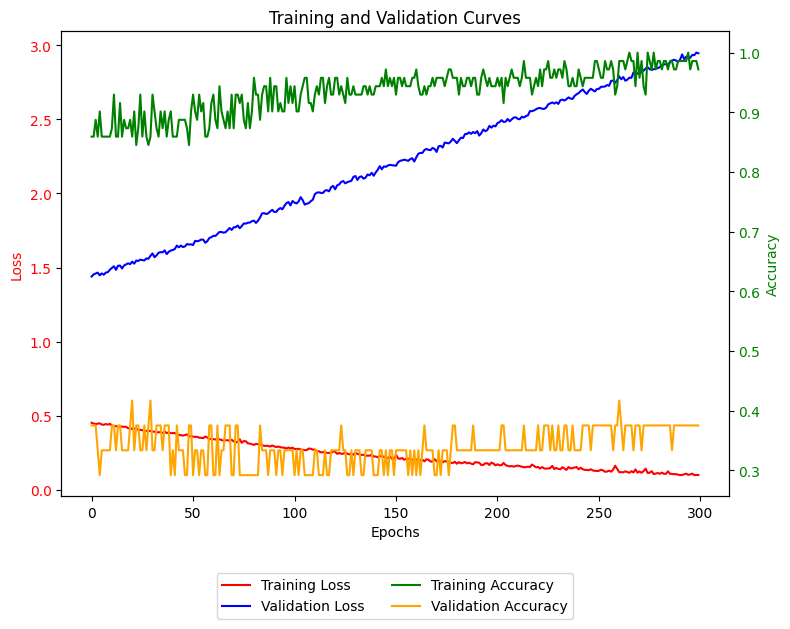

In [32]:
## Plot training and validation curves in a single plot
import matplotlib.pyplot as plt

history = keras_model.fit(preprocessor(X_train), y_train_onehot,
                           batch_size=20,
                           epochs=300,
                           validation_split=0.25)

fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()  # Create a second y-axis sharing the same x-axis

ax1.plot(history.history['loss'], color='red', label='Training Loss')
ax1.plot(history.history['val_loss'], color='blue', label='Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2.plot(history.history['accuracy'], color='green', label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
ax2.set_ylabel('Accuracy', color='green')
ax2.tick_params(axis='y', labelcolor='green')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
legend = ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center',
                    bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.subplots_adjust(bottom=0.3)

plt.tight_layout()
plt.title('Training and Validation Curves')
plt.show()


In [33]:
#-- Generate predicted y values

import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


predicted_probs = keras_model.predict(preprocessor(X_test))

prediction_column_index = np.argmax(predicted_probs, axis=1)

categories = list(y_train.astype('category').cat.categories)
prediction_labels = [categories[i] for i in prediction_column_index]

true_labels = y_test.tolist()


# Evaluate model performance
accuracy = accuracy_score(true_labels, prediction_labels)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(true_labels, prediction_labels))
print("Confusion Matrix:")
print(confusion_matrix(true_labels, prediction_labels))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Accuracy: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

     Average       0.67      0.75      0.71         8
        High       0.57      0.50      0.53         8
         Low       0.56      0.62      0.59         8
   Very High       0.78      0.78      0.78         9
    Very Low       0.75      0.67      0.71         9

    accuracy                           0.67        42
   macro avg       0.66      0.66      0.66        42
weighted avg       0.67      0.67      0.67        42

Confusion Matrix:
[[6 1 1 0 0]
 [2 4 0 2 0]
 [1 0 5 0 2]
 [0 2 0 7 0]
 [0 0 3 0 6]]


**Implement regularization techniques such as Dropout and Batch Normalization to improve model generalization and observe change in performance. <br>**
Note: Observe the training and testing loss and accuracy.

Epoch 1/300


/opt/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.1509 - loss: 2.4138 - val_accuracy: 0.1250 - val_loss: 1.6266
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2091 - loss: 2.4014 - val_accuracy: 0.3333 - val_loss: 1.6051
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3396 - loss: 2.0089 - val_accuracy: 0.3333 - val_loss: 1.5867
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2687 - loss: 1.9450 - val_accuracy: 0.4167 - val_loss: 1.5720
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3016 - loss: 1.8378 - val_accuracy: 0.3750 - val_loss: 1.5593
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2787 - loss: 1.9165 - val_accuracy: 0.4583 - val_loss: 1.5498
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4044 - loss: 1.6896 - val_accuracy: 0.5000 - val_loss: 1.5418
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3319 - loss: 1.4976 - val_accuracy: 0.5000 - val_loss: 1.5320
Epoch 9/300

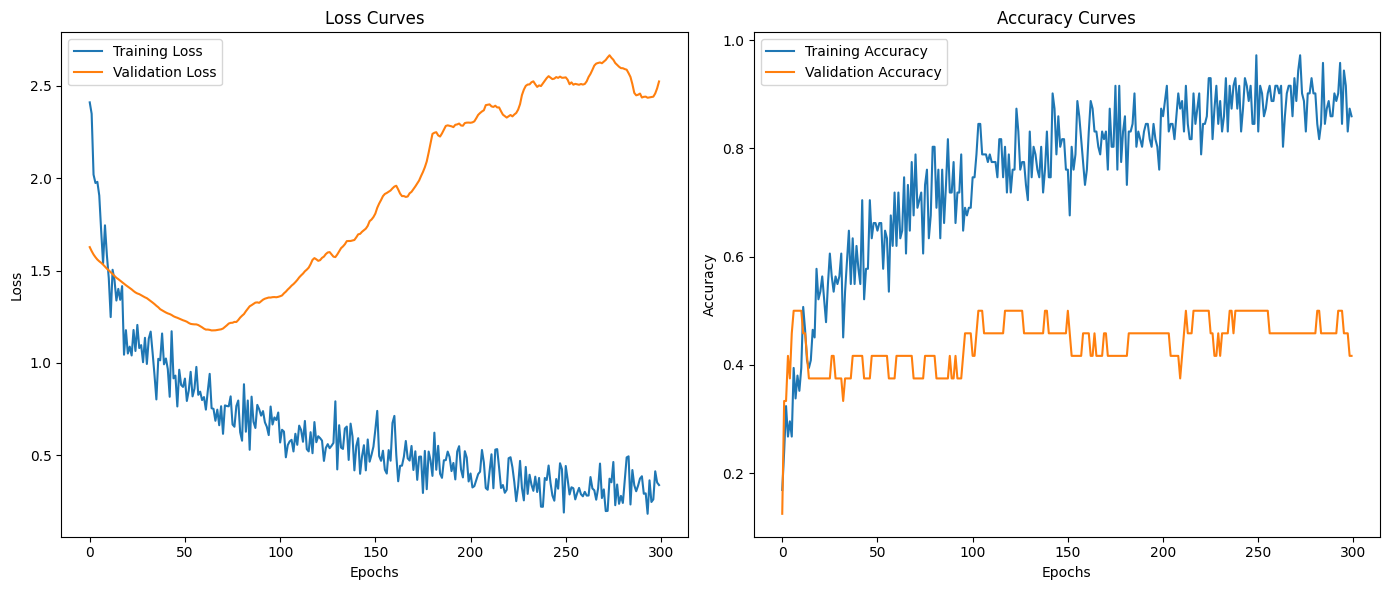

In [34]:
# Your code here:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

feature_count = preprocessor(X_train).shape[1]

# Build a deep learning model with regularization (Dropout and Batch Normalization)
keras_model_reg = Sequential([
    Dense(128, input_dim=feature_count, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),  # Dropout rate of 30%

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(5, activation='softmax')  # 5 neurons for 5 classes
])

keras_model_reg.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

y_train_onehot = to_categorical(y_train.astype('category').cat.codes)

history_reg = keras_model_reg.fit(preprocessor(X_train), y_train_onehot,
                                  batch_size=20,
                                  epochs=300,
                                  validation_split=0.25)

plt.figure(figsize=(14,6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history_reg.history['loss'], label='Training Loss')
plt.plot(history_reg.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history_reg.history['accuracy'], label='Training Accuracy')
plt.plot(history_reg.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')
plt.legend()

plt.tight_layout()
plt.show()


In [35]:
# Your comments about the change in performance

The training loss steadily decreases, and the training accuracy approaches nearly 100%.  
The validation loss starts off decreasing but then increases significantly over time, while the validation accuracy hovers around 40–50%. This gap between training and validation metrics remains large, suggesting that the model still struggles to generalize.  
The addition of Dropout and Batch Normalization has not fully resolved the overfitting issue, as evidenced by the large discrepancy between training and validation performance.

**Experiment with different activation functions (ReLU, LeakyReLU, Tanh, Sigmoid) to observe their impact on model performance.**

In [36]:
# Your code here:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np

y_train_onehot = to_categorical(y_train.astype('category').cat.codes)
y_test_onehot = to_categorical(y_test.astype('category').cat.codes)

feature_count = preprocessor(X_train).shape[1]

def build_model(activation='relu'):
    """
    Build a simple feed-forward network that uses the specified activation function
    in its hidden layers. For LeakyReLU, we demonstrate how to add it manually.
    """
    model = Sequential()

    # First layer:
    if activation.lower() == 'leakyrelu':
        model.add(Dense(128, input_dim=feature_count))
        model.add(LeakyReLU(alpha=0.1))  # alpha is the negative slope
    else:
        model.add(Dense(128, input_dim=feature_count, activation=activation))

    # Optional
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Second hidden layer
    if activation.lower() == 'leakyrelu':
        model.add(Dense(64))
        model.add(LeakyReLU(alpha=0.1))
    else:
        model.add(Dense(64, activation=activation))

    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Third hidden layer
    if activation.lower() == 'leakyrelu':
        model.add(Dense(32))
        model.add(LeakyReLU(alpha=0.1))
    else:
        model.add(Dense(32, activation=activation))

    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Output layer (5 classes, Softmax)
    model.add(Dense(5, activation='softmax'))

    # Compile with Adam optimizer and categorical crossentropy
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


# List of activation functions to try
activations = ['relu', 'leakyrelu', 'tanh', 'sigmoid']

results = {}
epochs = 50
batch_size = 32

for act in activations:
    print(f"Training with activation = {act}")
    model = build_model(activation=act)

    history = model.fit(
        preprocessor(X_train),
        y_train_onehot,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2,
        verbose=0
    )

    test_loss, test_acc = model.evaluate(preprocessor(X_test), y_test_onehot, verbose=0)

    results[act] = {
        'train_acc': history.history['accuracy'][-1],
        'val_acc': history.history['val_accuracy'][-1],
        'test_acc': test_acc
    }
    print(f"--> Final train_acc: {results[act]['train_acc']:.4f}, "
          f"val_acc: {results[act]['val_acc']:.4f}, "
          f"test_acc: {results[act]['test_acc']:.4f}\n")

print("Summary of Activation Function Experiments:")
for act, metrics in results.items():
    print(f"Activation: {act}\n"
          f"  - Train Accuracy: {metrics['train_acc']:.4f}\n"
          f"  - Val Accuracy:   {metrics['val_acc']:.4f}\n"
          f"  - Test Accuracy:  {metrics['test_acc']:.4f}\n")


Training with activation = relu


/opt/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


--> Final train_acc: 0.6184, val_acc: 0.2632, test_acc: 0.4762

Training with activation = leakyrelu


/opt/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


--> Final train_acc: 0.7237, val_acc: 0.4211, test_acc: 0.6429

Training with activation = tanh


/opt/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


--> Final train_acc: 0.5263, val_acc: 0.2632, test_acc: 0.5238

Training with activation = sigmoid


/opt/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


--> Final train_acc: 0.5132, val_acc: 0.3158, test_acc: 0.5238

Summary of Activation Function Experiments:
Activation: relu
  - Train Accuracy: 0.6184
  - Val Accuracy:   0.2632
  - Test Accuracy:  0.4762

Activation: leakyrelu
  - Train Accuracy: 0.7237
  - Val Accuracy:   0.4211
  - Test Accuracy:  0.6429

Activation: tanh
  - Train Accuracy: 0.5263
  - Val Accuracy:   0.2632
  - Test Accuracy:  0.5238

Activation: sigmoid
  - Train Accuracy: 0.5132
  - Val Accuracy:   0.3158
  - Test Accuracy:  0.5238



## 8. Explainability - SHAP Feature Importance

**To better understand our model's predictions, we will use **SHAP (SHapley Additive exPlanations)** to analyze feature importance.**

### 🔹 How SHAP Works?
- SHAP assigns each feature a **contribution score** for every prediction.
- Uses **Shapley values** (from game theory) to fairly distribute importance across features.

**We will now apply SHAP to visualize and interpret our model’s feature contributions.**


In [37]:
!pip install shap

/var/folders/2g/35k6q8190hsddcjkn4m7gyf40000gn/T/ipykernel_13702/2703306117.py:10: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values[:, :, 0], X_test_transformed, feature_names=feature_names)


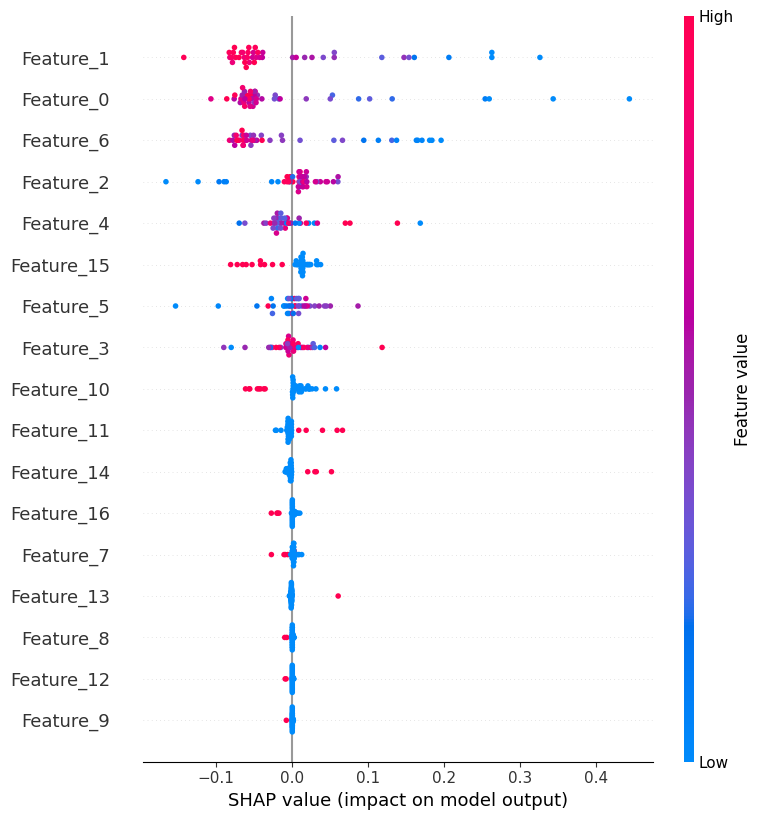

In [38]:
import shap
import matplotlib.pyplot as plt

explainer = shap.Explainer(keras_model, X_test_transformed)

shap_values = explainer(X_test_transformed)

feature_names = [f"Feature_{i}" for i in range(X_test_transformed.shape[1])]

shap.summary_plot(shap_values[:, :, 0], X_test_transformed, feature_names=feature_names)


<h3> Experimentation

In [39]:
print("SHAP values shape:", shap_values.values.shape)


SHAP values shape: (42, 17, 5)


**Deep learning models are often considered 'black boxes' due to their complexity. Explore methods such as SHAP (SHapley Additive exPlanations) to explain your model's predictions. After applying one of these methods, do you feel it provides a clear and sufficient explanation of how your model makes decisions? How easy or difficult is it to justify your model's predictions using these techniques?**

SHAP is a powerful tool for opening up the "black box" of deep learning models by attributing a contribution value to each feature for every prediction. In my experiment:

Clarity of Explanation:
SHAP’s summary plots, force plots, and dependence plots provide a visual and quantitative breakdown of how each feature influences the model's output. This can be quite illuminating—for example, a summary plot shows which features have the highest average impact on the model’s predictions, while a force plot can explain an individual prediction in detail.

Sufficiency:
While SHAP does a good job of highlighting the key features and their contribution scores, it may not always offer a fully "transparent" explanation of every internal mechanism. Deep learning models have complex, nonlinear interactions, and SHAP simplifies this into additive contributions. For many practical purposes, however, this level of explanation is both clear and sufficient.

Ease of Justification:
The ease with which one can justify a model’s predictions using SHAP depends on the complexity of the model and the domain. For simpler models or when using a well-tuned network, SHAP can provide very intuitive explanations. In contrast, for very deep models with many layers and interactions, the resulting SHAP values can be more difficult to interpret because multiple features might interact in subtle ways. Additionally, explaining these contributions to non-technical stakeholders sometimes requires further simplification or contextual explanation.

Overall, I find that SHAP greatly improves the interpretability of deep learning models, even though it might not capture every nuance of the model’s internal workings. It offers a practical balance between interpretability and the inherent complexity of deep models, making it a valuable tool for justifying model predictions.

### Summary
**Insights Found Useful:**

1.Feature Correlation:  

Economic and Health Indicators:  
Economic factors such as GDP per capita and health metrics like healthy life expectancy tend to be strongly correlated with the happiness categories. This suggests that higher economic and health standards are generally associated with higher levels of happiness.
Mixed Correlations:  
Some features, like social support and freedom of life choices, also show moderate correlations, indicating they are important but may interact with other factors.
Low or Inconsistent Correlations:
Features such as generosity or population might show lower or more inconsistent correlations with the target, indicating that their relationship with happiness could be more complex or non-linear.  

2.Distribution Analysis:  

Boxplots and Violin Plots:  
The visualizations using boxplots and violin plots reveal that different target categories have distinct distributions for key numerical features. For instance, countries in the "Very High" happiness category often have higher median GDP per capita and social support values compared to those in the "Very Low" category.  
Outliers:  
Outlier detection using the IQR method highlights that certain features have a significant number of outliers. This suggests that data cleaning or transformation (e.g., log transformation) might be necessary to reduce the impact of extreme values on model training.  

3.Model Behavior and Regularization:  

Overfitting Tendency:  
Observations from training and validation curves (loss and accuracy) indicate that models can quickly overfit the training data if not properly regularized. The addition of dropout and batch normalization improves generalization, though some gap between training and validation performance might remain.  
Activation Functions:  
Experimenting with different activation functions (ReLU, LeakyReLU, Tanh, Sigmoid) showed that while ReLU and LeakyReLU often lead to faster convergence and robust performance, Tanh and Sigmoid may sometimes suffer from vanishing gradient issues in deeper networks.  

4.Interpretability via SHAP:  

Feature Contribution:  
SHAP analysis provided a clear picture of how each feature contributes to the model’s predictions. It was insightful to see which features (e.g., GDP per capita, social support) have the strongest positive or negative influence on predicting happiness levels.  
Multi-class Interpretation:  
In a multi-class setting, SHAP values helped to identify that different classes might be influenced by features in different ways. Although the explanation is somewhat simplified, it offers a useful balance between interpretability and model complexity.  

**Observed Behaviors:**

Training vs. Validation Dynamics:  
The training curves often showed very high accuracy and low loss, while validation curves sometimes lagged, indicating that models are prone to overfitting. This behavior stresses the importance of regularization techniques and careful hyperparameter tuning.  

Impact of Regularization:  
With the introduction of dropout and batch normalization, training became more stable and the gap between training and validation metrics was reduced. This demonstrates the effectiveness of these techniques in improving model generalization.  

Activation Function Effects:  
Different activation functions affected the convergence speed and overall performance. ReLU-based models typically converged faster, while models using Tanh or Sigmoid sometimes converged slower or encountered gradient issues.  

SHAP Visualization:  
The SHAP summary plots offered a clear, visual breakdown of feature importance, reinforcing the findings from correlation and distribution analyses. However, interpreting the exact contribution for each prediction required careful attention, especially in a multi-class context.  



## 9. Submission of final report and clean code to github

[This is a final project you display on your GitHub to the World]

**Instructions**
- Make a new notebook, visualize any plots you found relevant
- Reproduce the code you used for the best models and display results
- Write what insights you found useful and what behaviours were observed
- Make it in a style of a clean, succint report (within the .ipynb)
- Upload this final report notebook to a new repository in your personal github account
- Remember to paste the link of your final repo at the top of this notebook where asked